In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
df = pd.read_csv("data/BankChurners.csv")

In [7]:
display(df.head())
print(df.isna().sum())


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [18]:
print(df.groupby("Attrition_Flag")["CLIENTNUM"].count())
print(df.groupby("Education_Level")["CLIENTNUM"].count())
print(df.groupby("Marital_Status")["CLIENTNUM"].count())
print(df.groupby("Income_Category")["CLIENTNUM"].count())

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
Name: CLIENTNUM, dtype: int64
Education_Level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
Name: CLIENTNUM, dtype: int64
Marital_Status
Divorced     748
Married     4687
Single      3943
Unknown      749
Name: CLIENTNUM, dtype: int64
Income_Category
$120K +            727
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
Less than $40K    3561
Unknown           1112
Name: CLIENTNUM, dtype: int64


In [19]:
print(df.groupby("Card_Category")["CLIENTNUM"].count())

Card_Category
Blue        9436
Gold         116
Platinum      20
Silver       555
Name: CLIENTNUM, dtype: int64


/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

IndexError: list index out of range

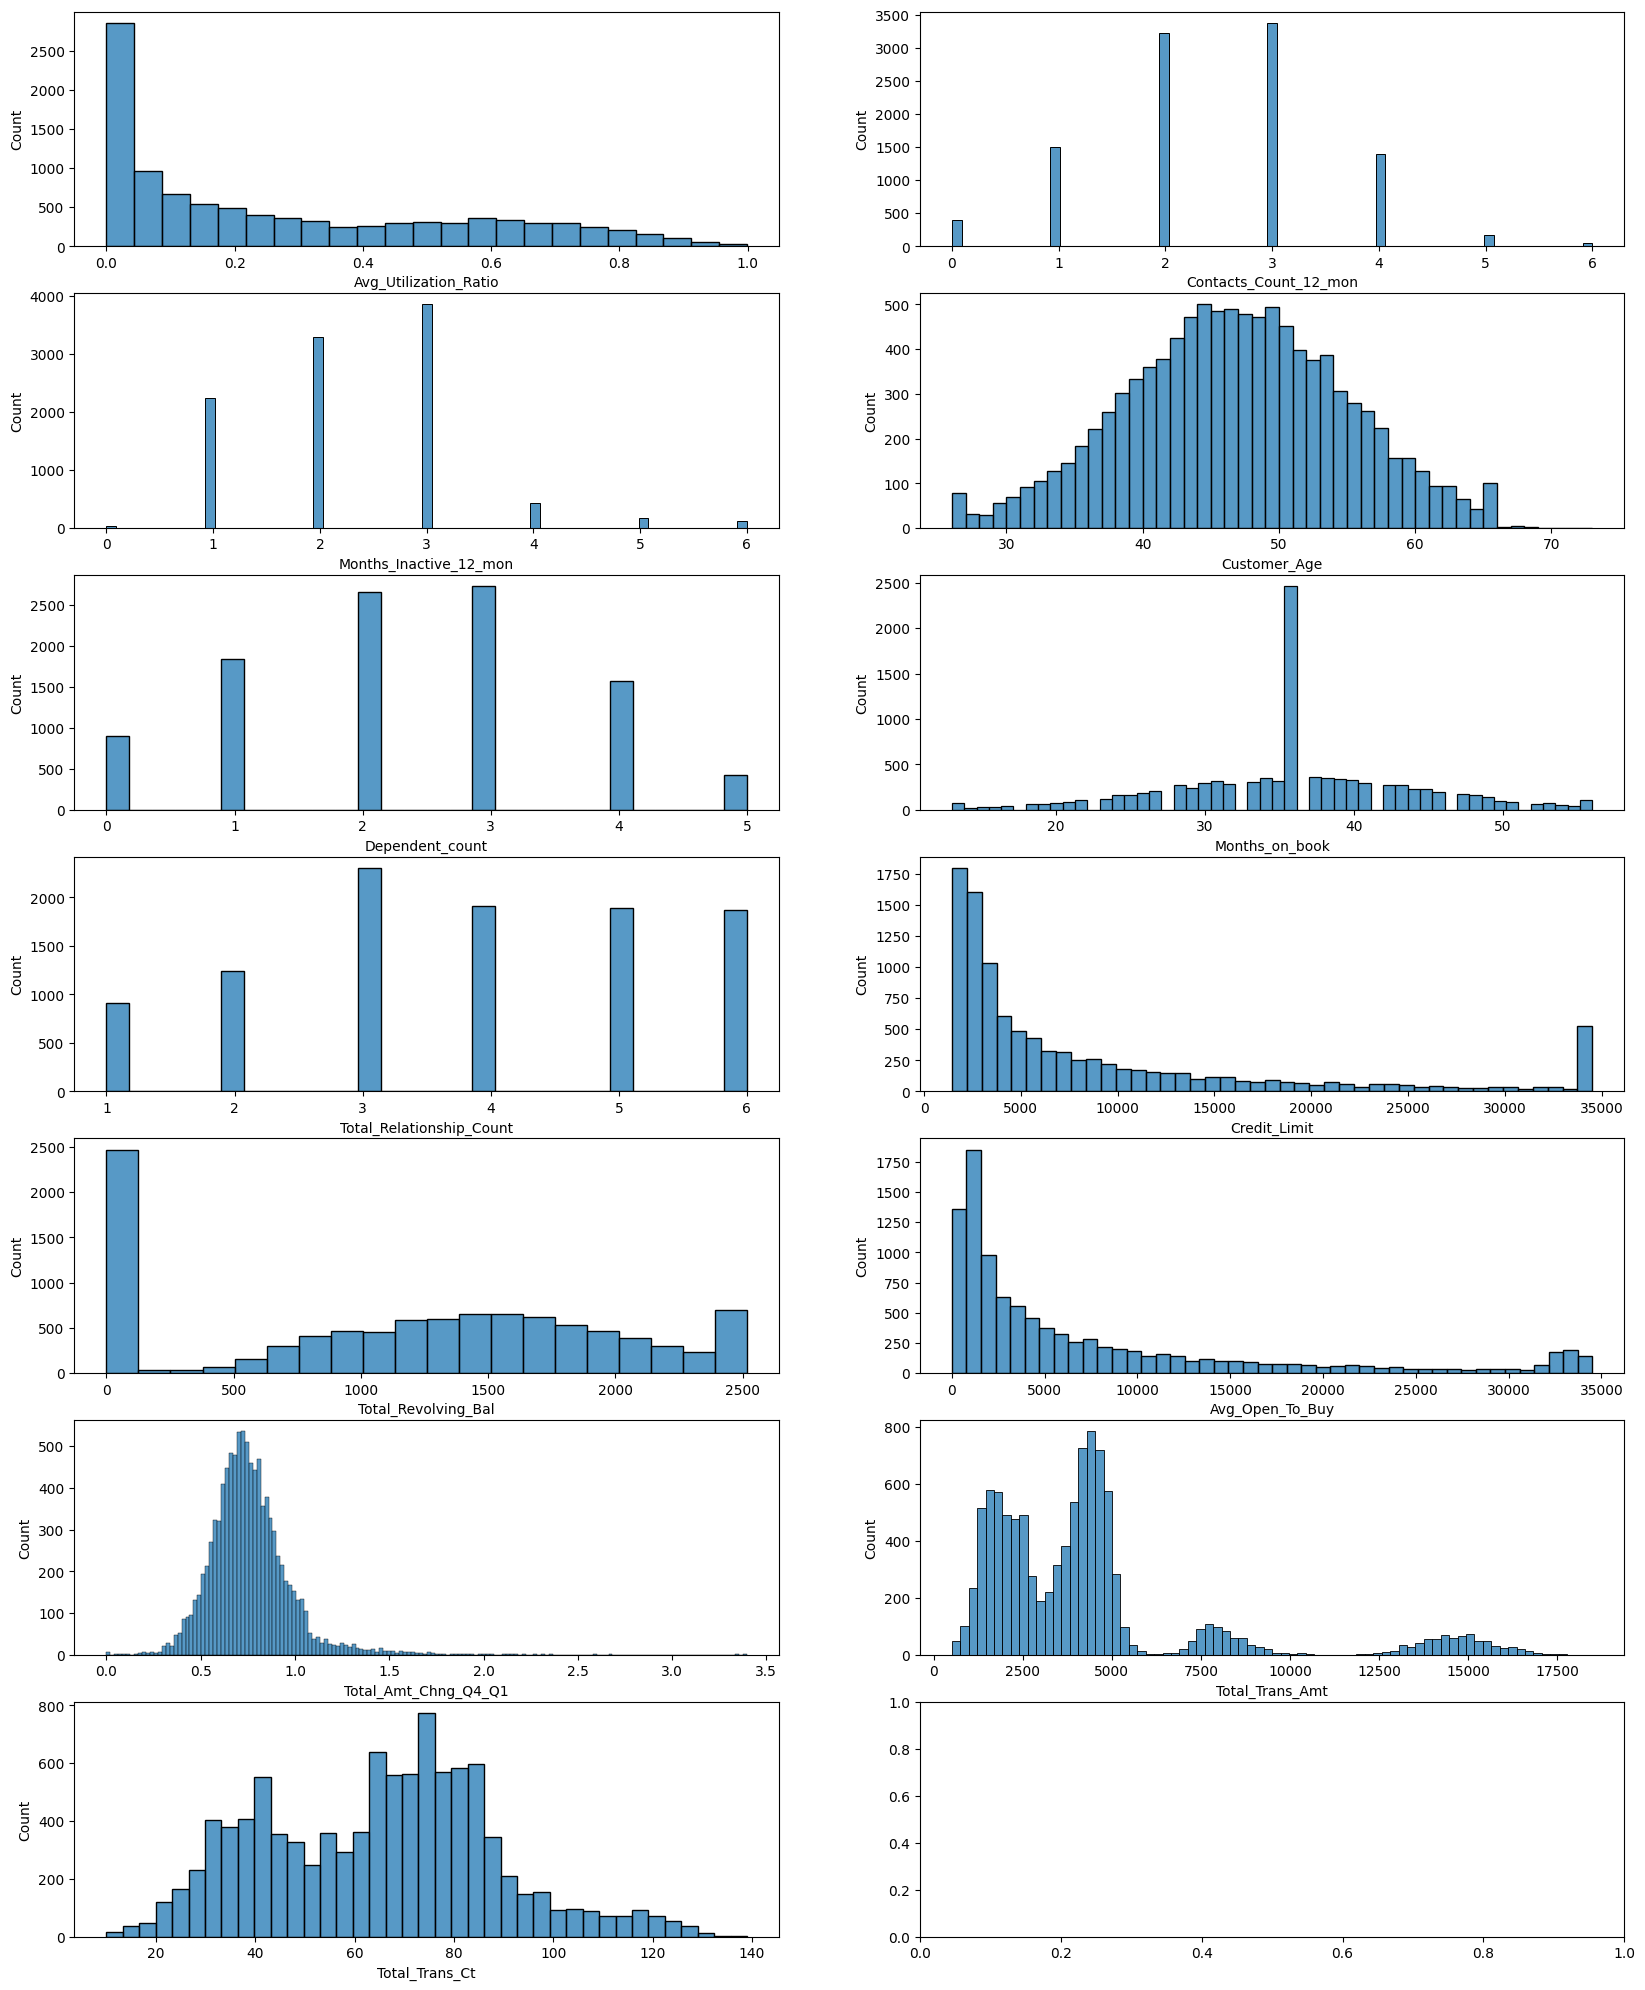

In [51]:
desired_columns = ["Avg_Utilization_Ratio","Contacts_Count_12_mon","Months_Inactive_12_mon","Customer_Age","Dependent_count","Months_on_book","Total_Relationship_Count", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct",]
if len(desired_columns) % 3 == 0:
    cols = 3
else:
    cols = 2
rows = ceil(len(desired_columns) / cols)
fig, axs = plt.subplots(rows,cols, figsize=(20,25))

for row in range(rows):
    for col in range(cols):
        sns.histplot(data=df[desired_columns[row*cols+col]], ax =axs[row][col])

Same graphics but for customer who have left

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

IndexError: list index out of range

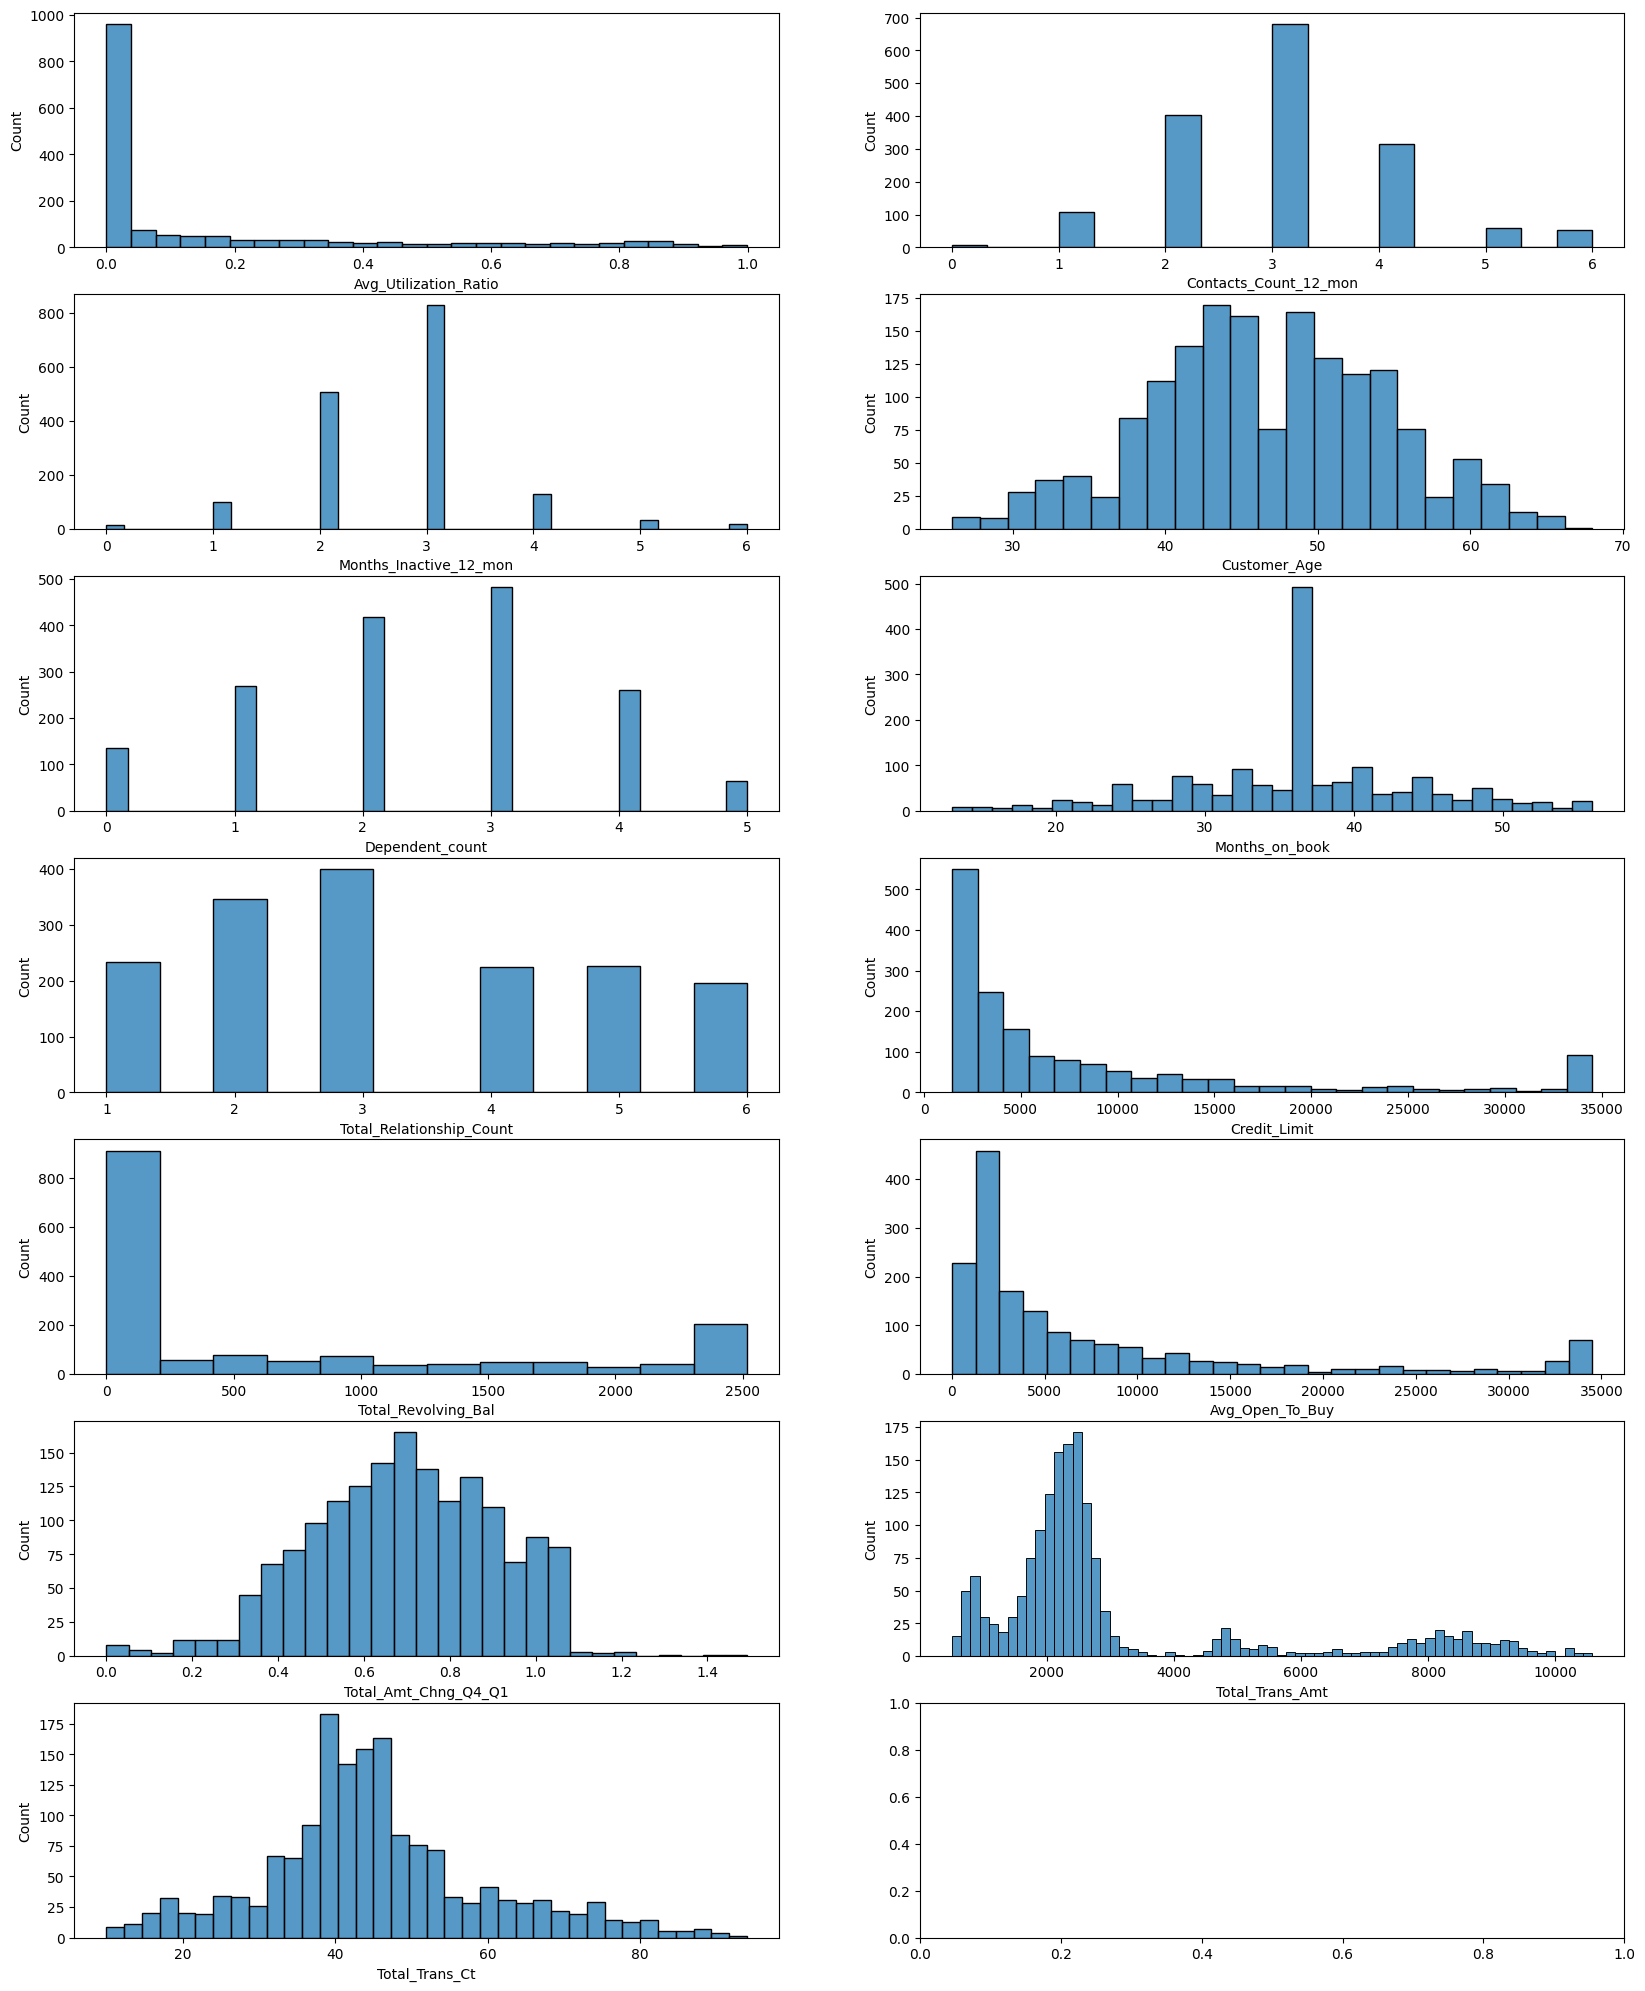

In [52]:
fig, axs = plt.subplots(rows,cols, figsize=(20,25))

for row in range(rows):
    for col in range(cols):
        sns.histplot(data=df.loc[df["Attrition_Flag"] == "Attrited Customer",desired_columns[row*cols+col]], ax =axs[row][col])

# First observations

### Seems to be insightful about churn rate:

- Low utilization ratio
- Apparently more contacts last 12 months
- Total revolving balance. Seems to indicate that people who leave use their card less
- Total Relationship count
- Total Transaction count. Might need to be adjusted for time with card, but once again seems to point to people who uses less jump ship.

### Seems to not be related to churn rate:

- Months inactive.
- Age. Weird fun gap at late 40s, but probably due to chance. Need to be aware when modelling
- Dependent count
- Avg Open to buy. (I don't even know what this column means, seem similar enough for now)


### Undecided:

- Months on book. Has the weird spike, looks like data flaw, needs further investigation.
- Credit limit. Does not look super impactful but worth a deeper look.
- Total transaction amount and change: Does not seem to be super impactful but worth more careful look